In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
in_dir = 'titanic_dataset'
train_csv = 'train.csv'
df = pd.read_csv(os.path.join(in_dir, train_csv))

In [3]:
%matplotlib inline

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


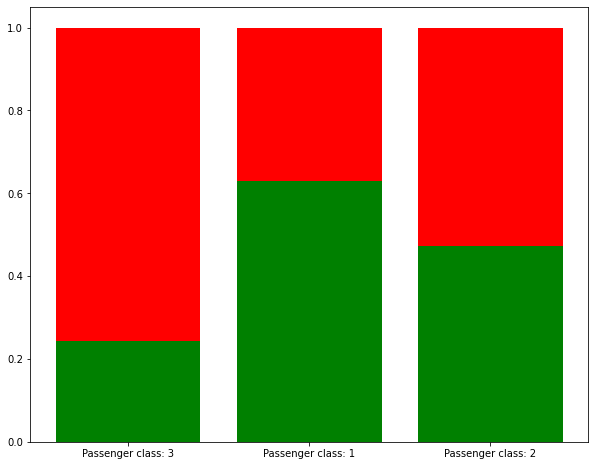

In [5]:
#checking the dependence of Pclass on the survival outcome

fig, ax = plt.subplots(figsize=(10, 8))
for p_class in df['Pclass'].unique():
    filtered_df = df.copy()
    filtered_df = filtered_df[filtered_df['Pclass'] == p_class]
    survived_count = np.sum((filtered_df['Survived']== 1).astype(np.int16))
    dead_count = np.sum((filtered_df['Survived']== 0).astype(np.int16))
    assert survived_count + dead_count == len(filtered_df), "Something went worng"
    ax.bar(x="Passenger class: {}".format(p_class), height=survived_count/len(filtered_df), bottom=0, color='g')
    ax.bar(x="Passenger class: {}".format(p_class), height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')

male
female


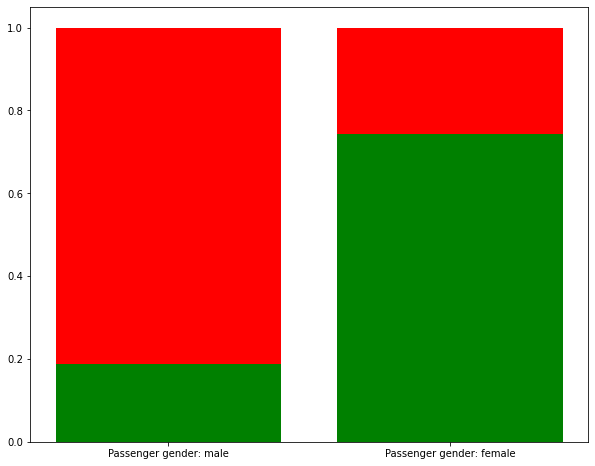

In [6]:
#checking the dependence of passenger gender on the survival outcome

fig, ax = plt.subplots(figsize=(10, 8))
for i, p_gender in enumerate(df['Sex'].unique()):
    print(p_gender)
    filtered_df = df.copy()
    filtered_df = filtered_df[filtered_df['Sex'] == p_gender]
    survived_count = np.sum((filtered_df['Survived']== 1).astype(np.int16))
    dead_count = np.sum((filtered_df['Survived']== 0).astype(np.int16))
    assert survived_count + dead_count == len(filtered_df), "Something went worng"
    ax.bar(x="Passenger gender: {}".format(p_gender), height=survived_count/len(filtered_df), bottom=0, color='g')
    ax.bar(x="Passenger gender: {}".format(p_gender), height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')

<ipython-input-7-e05eae7472a0>:11: RuntimeWarning: invalid value encountered in long_scalars
  ax.bar(x=bin_edges[i], height=survived_count/len(filtered_df), bottom=0, color='g')
<ipython-input-7-e05eae7472a0>:12: RuntimeWarning: invalid value encountered in long_scalars
  ax.bar(x=bin_edges[i], height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')
<ipython-input-7-e05eae7472a0>:11: RuntimeWarning: invalid value encountered in long_scalars
  ax.bar(x=bin_edges[i], height=survived_count/len(filtered_df), bottom=0, color='g')
<ipython-input-7-e05eae7472a0>:12: RuntimeWarning: invalid value encountered in long_scalars
  ax.bar(x=bin_edges[i], height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')


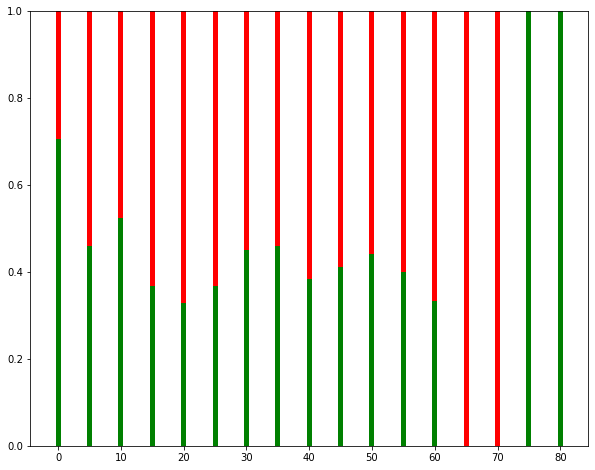

In [7]:
# dependence of Age on the survival of passengers
hist, bin_edges = np.histogram(df['Age'], bins=np.arange(0, 100, 5))

fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(bin_edges)-1):
    filtered_df = df.copy()
    filtered_df = filtered_df[filtered_df['Age'].between(left=bin_edges[i], right=bin_edges[i+1])]
    survived_count = np.sum((filtered_df['Survived']== 1).astype(np.int16))
    dead_count = np.sum((filtered_df['Survived']== 0).astype(np.int16))
#     print(bin_edges[i], bin_edges[i+1], survived_count, dead_count)
    ax.bar(x=bin_edges[i], height=survived_count/len(filtered_df), bottom=0, color='g')
    ax.bar(x=bin_edges[i], height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')

In [8]:
df['Sex_mod'] = np.where(df['Sex']== 'male', 0, 1)
conditions = [
    (df['Embarked'] == 'S'),
    (df['Embarked'] == 'C'), 
    (df['Embarked'] == 'Q'),
    (df['Embarked'].isnull())
    ]
values = [1, 2, 3, 0]
df['Embarked_mod'] = np.select(conditions, values)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_mod,Embarked_mod
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [9]:
filtered_df = df[df['Age'].notnull()]

In [10]:
# because we already know the survival classes, I think it would be best to use LDA here
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = filtered_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_mod', 'Embarked_mod']]
y = filtered_df['Survived']
X, y

(     Pclass   Age  SibSp  Parch  Sex_mod  Embarked_mod
 0         3  22.0      1      0        0             1
 1         1  38.0      1      0        1             2
 2         3  26.0      0      0        1             1
 3         1  35.0      1      0        1             1
 4         3  35.0      0      0        0             1
 ..      ...   ...    ...    ...      ...           ...
 885       3  39.0      0      5        1             3
 886       2  27.0      0      0        0             1
 887       1  19.0      0      0        1             1
 889       1  26.0      0      0        0             2
 890       3  32.0      0      0        0             3
 
 [714 rows x 6 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 714, dtype: int64)

In [11]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit(X, y).transform(X)

In [12]:
lda.coef_

array([[-1.40521858, -0.04526566, -0.3574973 , -0.05833811,  3.36442466,
         0.16022395]])

In [13]:
sorted_X_lda = np.sort(np.array([i[0] for i in X_lda]))

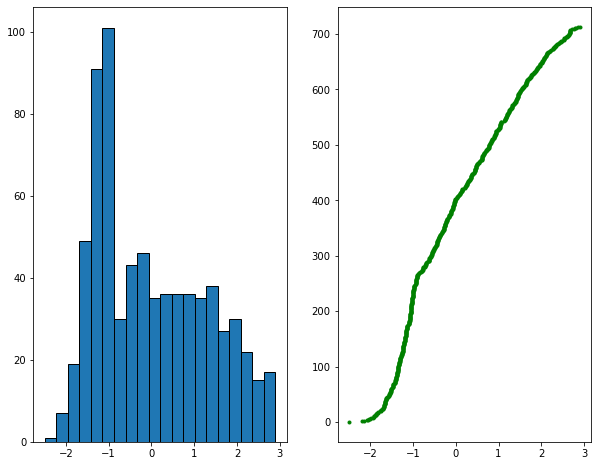

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
ax[0].hist(X_lda, ec='k', bins=20)
ax[1].plot(sorted_X_lda, range(len(X_lda)), 'g.')

In [17]:
y = np.arange(len(X_lda))
x = sorted_X_lda

#now performing a double gaussian fit on the LDA weights
from scipy.special import erf
from lmfit import Model

# define the basic model.  I included an amplitude parameter
def gaussian_cdf(x, amp, mu, sigma):
    return (amp/2.0)*(1 + erf( (x-mu)/(sigma*np.sqrt(2))))

# create a model that is the sum of two gaussian_cdfs
# note that a prefix names each component and will be
# applied to the parameter names for each model component
model = Model(gaussian_cdf, prefix='g1_') + Model(gaussian_cdf, prefix='g2_')

# make a parameters object -- a dict with parameter names
# here you add the guess values to your model. Try to get a nice guess of mu
# the other don't worry too much
params = model.make_params(g1_amp=1, g1_mu=-1.5, g1_sigma=0.5,
                           g2_amp=1, g2_mu=0.5, g2_sigma=1)

# you can apply bounds to any parameter
params['g1_sigma'].min = 0   # sigma must be > 0!
params['g2_sigma'].min = 0   # sigma must be > 0!

params['g1_amp'].min = 0
params['g2_amp'].min = 0

# run the fit
result = model.fit(y, params, x=x)

print(result.fit_report())

# plot results, including individual components
comps = result.eval_components(result.params, x=x)

[[Model]]
    (Model(gaussian_cdf, prefix='g1_') + Model(gaussian_cdf, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 171
    # data points      = 714
    # variables        = 6
    chi-square         = 504.828466
    reduced chi-square = 0.71303456
    Akaike info crit   = -235.518284
    Bayesian info crit = -208.092986
##  Warning: uncertainties could not be estimated:
[[Variables]]
    g1_amp:    3.1865e-04 (init = 1)
    g1_mu:     29092.0394 (init = -1.5)
    g1_sigma:  3915.64482 (init = 0.5)
    g2_amp:    2.81482385 (init = 1)
    g2_mu:     577.794166 (init = 0.5)
    g2_sigma:  103.890398 (init = 1)


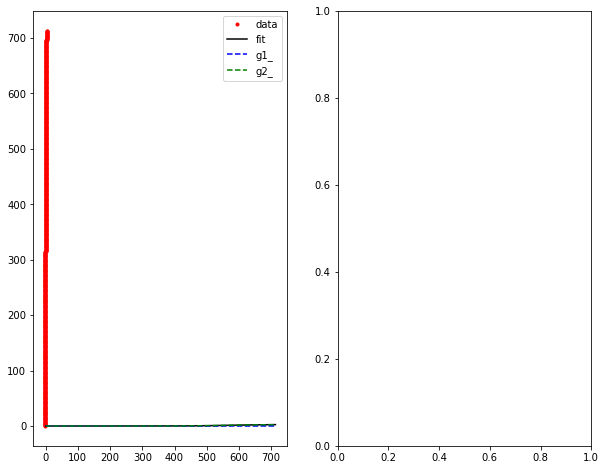

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

ax[0].plot(y, x,'r.', label='data')
ax[0].plot(x, result.best_fit, 'k-', label='fit')
ax[0].plot(x, comps['g1_'], 'b--', label='g1_')
ax[0].plot(x, comps['g2_'], 'g--', label='g2_')
ax[0].legend(loc='best')

In [ ]:
def gaussian_pdf(x, amp, mu, sigma):
    return (amp/(sigma*np.sqrt(2*np.pi)))*np.exp(-((x-mu)**2/(2*sigma**2)))

bins=np.arange(10, 50, 1)
ax[1].hist(data[sheet], bins=bins, density=True, alpha=0.8, color='gray', rwidth=0.85,  \
           label='N = {0}'.format(len(data[sheet])))

x = np.linspace(0, 50, 200)


##plotting the second gaussian
amp2 = result.params['g2_amp']
mu2 = result.params['g2_mu']
sigma2 = result.params['g2_sigma']
ax[1].plot(x, gaussian_pdf(x, amp2, mu2, sigma2), 'g--', \
           label='$\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(mu2.value, sigma2.value))

##plotting the first gaussian
amp1 = result.params['g1_amp']
mu1 = result.params['g1_mu']
sigma1 = result.params['g1_sigma']
ax[1].plot(x, gaussian_pdf(x, amp1, mu1, sigma1), 'b--', \
           label='$\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(mu1.value, sigma1.value))

ax[1].legend(loc='best')
ax[1].set_ylim(bottom=0, top=0.4)
fig.tight_layout()